<a href="https://colab.research.google.com/github/Didier06/IA_FABLAB/blob/main/Digit_recognition-opencv/ann_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!git clone https://github.com/Didier06/IA_FABLAB

Cloning into 'IA_FABLAB'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 41 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (41/41), 6.64 MiB | 15.78 MiB/s, done.
Resolving deltas: 100% (4/4), done.


## Un réseau avec keras pour lire les nombres de 0 à 9

**Loading the MNIST dataset in Keras**

In [16]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [17]:
train_images.shape # dimension de dimension 3

(60000, 28, 28)

In [18]:
len(train_labels) # obtenir la longueur des étiquettes (60 000 de 0 à 9)
#print(train_labels)

60000

In [19]:
train_labels # affiche train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
len(test_labels)

10000

In [22]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**Architecture du réseau**

In [23]:
from tensorflow import keras
from keras import layers
""" Un réseau neuronal récurrent (RNN) est un modèle de deep learning
qui est entraîné pour traiter et convertir une entrée de données séquentielle
en une sortie de données séquentielle spécifique."""
model = keras.Sequential([
    layers.Dense(512, activation="relu"),# 512 neurones activation relu en entrée une image 28*28 bits
    layers.Dense(10, activation="softmax")# 10  classes à prédire : 0-9
])

**Compilation du réseau**

In [24]:
# compilation du modèle
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


**Preparation des données (images)**

In [25]:
train_images_keras = train_images.reshape((60000, 28 * 28))# 2 dimensions : une étiquette et une vecteur de longueur 28*28 = 784
train_images_keras = train_images_keras.astype("float32") / 255 #  on normalise les pixels valeur dans l'intervalle [0,1]
test_images_keras = test_images.reshape((10000, 28 * 28))
test_images_keras = test_images_keras.astype("float32") / 255

train_labels_keras = keras.utils.to_categorical(train_labels) # [5] --> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] réprésentation du label 5
test_labels_keras = keras.utils.to_categorical(test_labels)
#print(train_labels[0:2])
#print(train_labels_keras[0:2])


**Entrainement du modèle (Fitting" the model)**

In [26]:
model.fit(train_images_keras, train_labels_keras,validation_data=(test_images_keras, test_labels_keras),epochs=5, batch_size=128)
scores = model.evaluate(test_images_keras, test_labels_keras)
print(f"Neural network accuracy: {scores[1]*100:.2f} % ") #o, multiplie par 100 et on garde 2 chiffres après la virgule
# échantillon 60 000/128

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2663 - accuracy: 0.9238 - val_loss: 0.1324 - val_accuracy: 0.9614
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1091 - accuracy: 0.9681 - val_loss: 0.0920 - val_accuracy: 0.9731
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0716 - accuracy: 0.9789 - val_loss: 0.0807 - val_accuracy: 0.9745
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0496 - accuracy: 0.9856 - val_loss: 0.0731 - val_accuracy: 0.9770
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9767
Neural network accuracy: 97.67 % 


**Sauvegarde du réseau (Saving the model)**

In [28]:
model.save('/content/IA_FABLAB/Digit_recognition-opencv/model/model_ANN_dense.keras')# format .keras
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Utilisation du modèle pour faire des prédistions (Using the model to make predictions)**

In [29]:
test_digits = test_images_keras[0:10] # 10 images à tester
predictions = model.predict([test_digits])
#print(test_digits.shape)
print(predictions[0])
print("Chiffre prédit pour la première image : ", predictions[0].argmax())# index  of the class with highest probability
print(predictions[1])
print("Chiffre prédit pour la 2ème image : ", predictions[1].argmax())# index  of the class with highest probability

1/1 [==============================] - 0s 72ms/step
[2.5573927e-06 6.4449171e-07 6.3391133e-05 3.1367633e-03 2.1476592e-09
 6.3124035e-06 3.8100949e-11 9.9672258e-01 3.5013316e-05 3.2718210e-05]
Chiffre prédit pour la première image :  7
[2.4846340e-08 3.8235823e-05 9.9995798e-01 1.9143051e-06 1.3461349e-11
 1.2802882e-08 2.3988379e-08 3.9908723e-12 1.8034756e-06 6.2779691e-13]
Chiffre prédit pour la 2ème image :  2


In [30]:
print(predictions[0][7])  # autre façon pour afficher les prédictions
print(predictions[1][2])

0.9967226
0.999958


In [31]:
print(test_labels[0])# vérification
print(test_labels[1])


7
2


**Evaluiation du modèle avec les données de test avec la méthode évaluate (Evaluating the model on new data)**

In [32]:
test_loss, test_acc = model.evaluate(test_images_keras, test_labels_keras)
print(f"test_acc: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9767
test_acc: 0.9767


**Affichage des digits (Displaying the digi)**

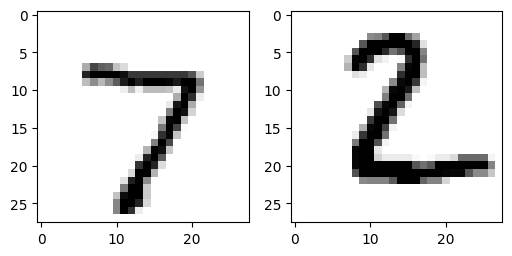

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(1, 2, 1)# subplots pour permettre de créer plusieurs graphes dans une même figure
ax1.imshow(test_images[0], cmap=plt.cm.binary)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(test_images[1], cmap=plt.cm.binary)
plt.show()

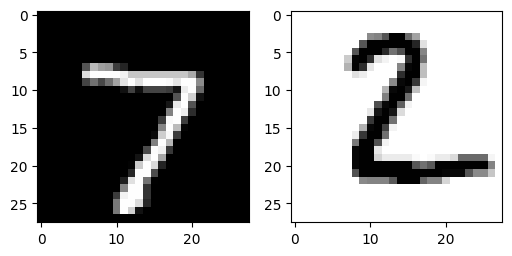

In [34]:
# autre affichage....
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(1, 2, 1)# subplots pour permettre de créer plusieurs graphes dans une même figure
ax1.imshow(test_images[0], cmap="gray")
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(test_images[1], cmap=plt.cm.binary)

plt.show()

**Prédictions avec une image dessinée sur paint.**

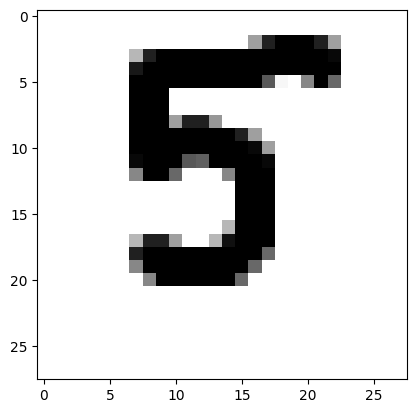

In [36]:
# reading png image file
import matplotlib.pyplot as plt
import matplotlib.image as img
im = img.imread('/content/IA_FABLAB/Digit_recognition-opencv/images/digit_5.png')
plt.imshow(im, cmap=plt.cm.binary)
#print(im.shape)
#print(img.shape)

**Préparation de l'image dessinée et prédiction**

In [37]:
from PIL import Image, ImageOps
import numpy as np
def preprocess_image(image_path):# préparation de l'image
    img = Image.open(image_path).convert('L')  # Convertir en niveau de gris grayscale
    img = ImageOps.invert(img)                 # inverse l'image pour qu'elle soit conforme aux images MNIST
    img = img.resize((28, 28))                 # Redimensionnement à 28x28
    img = np.array(img)                        # Convertir en tableau numpy
    img = img / 255.0                          # on normalise les valeurs des pixels
    img = img.reshape(1, 28*28)               # redimensionne en 784 = 28*28 (entrée du réseau)
    return img

processed_image = preprocess_image('/content/IA_FABLAB/Digit_recognition-opencv/images/digit_5.png')
predictions= model.predict(processed_image)# prévision

print(predictions.round(2)) # résultat
print("Chiffre prédit : ", predictions.argmax())# index  of the class with highest probability


1/1 [==============================] - 0s 72ms/step
[[0.   0.   0.   0.   0.   0.92 0.01 0.   0.07 0.  ]]
Chiffre prédit :  5
